In [3]:
import sys, os
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

Global oldest review: 2007-11-01 00:00:00
Global newest review: 2023-11-20 00:00:00


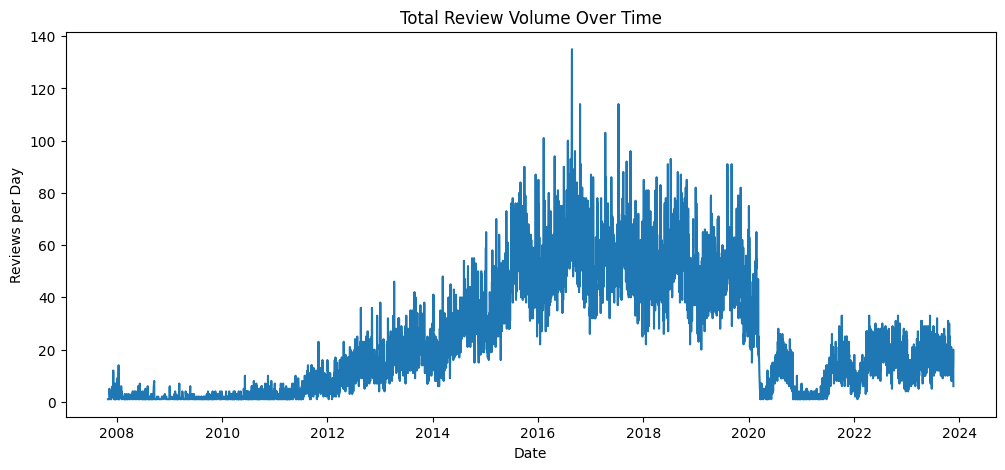

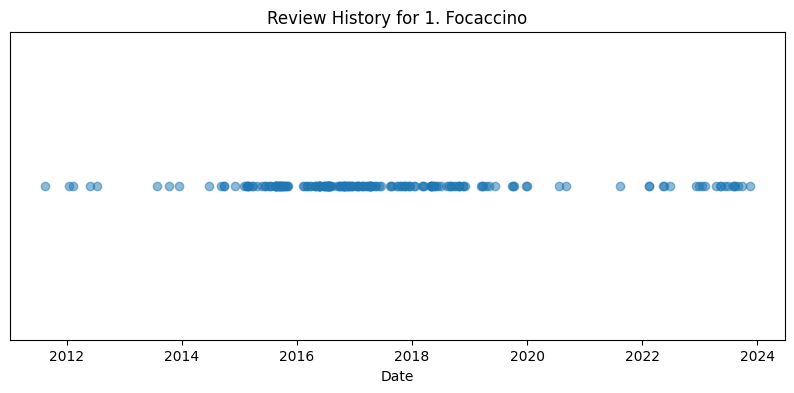

In [6]:
from src.preprocessing import (
    fix_stringified_date_lists, deduplicate_date_lists,
    add_date_features, add_review_count, add_review_period,
    extract_latest_review, extract_oldest_review,
    explode_dates, plot_review_trend, plot_review_history
)

df = pd.read_csv("../data/raw/berlin_reviews_2.csv")

# 1. Convert strings → lists
df = fix_stringified_date_lists(df, column="dates")

# 2. Remove duplicates
df = deduplicate_date_lists(df, column="dates")

# 3. Parse dates (turn strings into datetime)
df = add_date_features(df, date_column="dates")

# 4. Add analytics
df = add_review_count(df)
df = add_review_period(df)

# 5. Global stats
print("Global oldest review:", extract_oldest_review(df))
print("Global newest review:", extract_latest_review(df))

# 6. Plot global trends
plot_review_trend(df)

# 7. Plot one restaurant
plot_review_history(df, name_column="title", restaurant_name="1. Focaccino")


In [7]:
df

,title,url,cuisines,reviews,star rating,page number,data offset,restaurant,dates,dates_parsed,earliest_date,latest_date,review_count,review_period_days
0,1. Focaccino,https://www.tripadvisor.in/Restaurant_Review-g...,"Italian, Sicilian","[""The atmosphere is very classy yet cozy. The ...",4.5 of 5 bubbles,0,0,1,"[13 November 2023, 23 September 2023, 28 Augus...","[2023-11-13 00:00:00, 2023-09-23 00:00:00, 202...",2011-08-19,2023-11-13,202,4469.0
1,2. Cafe Couscous - Vege,https://www.tripadvisor.in/Restaurant_Review-g...,"Healthy, Mediterranean","[""The best wraps in Berlin period. I suggest g...",5.0 of 5 bubbles,0,0,2,"[25 October 2023, 10 August 2023, 9 June 2023,...","[2023-10-25 00:00:00, 2023-08-10 00:00:00, 202...",2016-03-06,2023-10-25,45,2789.0
2,3. Hackethals,https://www.tripadvisor.in/Restaurant_Review-g...,"German, Bar",['I found this place on TripAdvisor and wanted...,4.5 of 5 bubbles,0,0,3,"[8 November 2023, 4 November 2023, 31 October ...","[2023-11-08 00:00:00, 2023-11-04 00:00:00, 202...",2008-01-19,2023-11-08,697,5772.0
3,4. Restaurant Buschbeck's,https://www.tripadvisor.in/Restaurant_Review-g...,"German, European","[""As my wife is a coeliac I had to research pl...",5.0 of 5 bubbles,0,0,4,"[24 October 2023, 1 October 2023, 15 August 20...","[2023-10-24 00:00:00, 2023-10-01 00:00:00, 202...",2017-05-08,2023-10-24,88,2360.0
4,5. 100 Gramm Bar,https://www.tripadvisor.in/Restaurant_Review-g...,"Bar, Eastern European","['This place is amaizing! I loved the vibe, th...",5.0 of 5 bubbles,0,0,5,"[23 August 2023, 21 April 2023, 24 February 20...","[2023-08-23 00:00:00, 2023-04-21 00:00:00, 202...",2019-05-07,2023-08-23,49,1569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5785,6356. Bao Club,https://www.tripadvisor.in/Restaurant_Review-g...,"Chinese, Asian",NaN,NaN,211,6330,6356,NaN,None,NaT,NaT,0,NaN
5786,6357. Wurstkessel im KaDeWe,https://www.tripadvisor.in/Restaurant_Review-g...,"French, International",NaN,NaN,211,6330,6357,NaN,None,NaT,NaT,0,NaN
5787,6358. World of Champagne (Champagne Bar),https://www.tripadvisor.in/Restaurant_Review-g...,"French, Bar",NaN,NaN,211,6330,6358,NaN,None,NaT,NaT,0,NaN
5788,6359. Chibo,https://www.tripadvisor.in/Restaurant_Review-g...,NaN,NaN,NaN,211,6330,6359,NaN,None,NaT,NaT,0,NaN
